# **Introduction**
## Weather Data Analysis of Central Mindanao University


---



A comprehensive examination of meteorological data collected from the weather station at Central Mindanao University. This project aims to uncover significant patterns and trends in various weather parameters, providing valuable insights for forecasting and environmental planning. By analyzing data such as temperature, humidity, precipitation, and weather conditions, this study offers a detailed understanding of the local climate dynamics in Central Mindanao.

Central Mindanao University, renowned for its dedication to agricultural research and development, operates a sophisticated weather station that continuously monitors a wide range of atmospheric variables. This project leverages the rich dataset generated by this station to analyze the region's weather patterns comprehensively. The analysis highlights the interplay between different weather elements, shedding light on their correlations and variations over time.

Through a series of visualizations, including heatmaps, time series plots, histograms, box plots, scatter plots, and bar charts, this project delves into the intricacies of the local climate. The insights gained from this analysis are crucial for enhancing weather prediction models, optimizing agricultural practices, and improving overall environmental management in the region.

Explore this project to understand the weather dynamics at Central Mindanao University and discover how data-driven analysis can lead to more informed decision-making and better preparedness for diverse weather scenarios.


# **Data Loading**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
local = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Weather Data Analysis/maramag 2023-04-01 to 2023-05-01.csv')

# **Data Cleaning**

In [5]:
local.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,maramag,2023-04-01T00:00:00,21.8,21.8,20.9,94.63,0.0,0,NaN,0,...,1010.0,93.9,24.1,0,0.0,0,10,Overcast,cloudy,remote
1,maramag,2023-04-01T01:00:00,21.6,21.6,20.7,94.62,0.0,0,NaN,0,...,1010.0,83.0,24.1,0,0.0,0,10,Partially cloudy,partly-cloudy-night,remote
2,maramag,2023-04-01T02:00:00,22.4,22.4,21.9,97.00,0.0,0,NaN,0,...,1007.5,100.0,16.0,0,0.0,0,3,Overcast,cloudy,98751099999
3,maramag,2023-04-01T03:00:00,21.5,21.5,20.5,94.04,0.0,0,NaN,0,...,1009.0,93.4,24.1,0,0.0,0,3,Overcast,cloudy,remote
4,maramag,2023-04-01T04:00:00,21.4,21.4,20.4,94.03,0.0,0,NaN,0,...,1009.0,97.5,24.1,0,0.0,0,10,Overcast,cloudy,remote


In [6]:
local.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              744 non-null    object 
 1   datetime          744 non-null    object 
 2   temp              744 non-null    float64
 3   feelslike         744 non-null    float64
 4   dew               744 non-null    float64
 5   humidity          744 non-null    float64
 6   precip            744 non-null    float64
 7   precipprob        744 non-null    int64  
 8   preciptype        176 non-null    object 
 9   snow              744 non-null    int64  
 10  snowdepth         744 non-null    int64  
 11  windgust          744 non-null    float64
 12  windspeed         744 non-null    float64
 13  winddir           744 non-null    float64
 14  sealevelpressure  744 non-null    float64
 15  cloudcover        744 non-null    float64
 16  visibility        744 non-null    float64
 1

In [7]:
#Check for missing values
local.isna().sum()

name                  0
datetime              0
temp                  0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
preciptype          568
snow                  0
snowdepth             0
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk            0
conditions            0
icon                  0
stations              0
dtype: int64

In [8]:
# Remove the column that has missing values (this column is not that important)
local = local.drop('preciptype', axis=1)

In [9]:
# Check again if the missing valuesa are removed
local.isna().sum()

name                0
datetime            0
temp                0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
conditions          0
icon                0
stations            0
dtype: int64

In [10]:
# Check for duplicated data
local.duplicated().sum()

0

In [11]:
# Describe the statistics of the data
local.describe()

,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.0,744.0,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,25.326613,26.301882,21.158602,79.634597,0.305376,14.784946,0.0,0.0,6.844086,3.720161,87.579839,1009.252151,70.846909,21.005242,277.581989,0.997984,2.762097,15.271505
std,3.809631,5.180572,1.335510,15.184504,2.513259,35.518948,0.0,0.0,3.685984,2.764639,99.448457,1.865280,30.712674,4.339987,363.442804,1.308368,3.651525,12.318188
min,18.400000,18.400000,14.800000,35.770000,0.000000,0.000000,0.0,0.0,0.700000,0.000000,0.400000,1004.000000,0.000000,3.500000,0.000000,0.000000,0.000000,3.000000
25%,22.275000,22.275000,20.400000,68.192500,0.000000,0.000000,0.0,0.0,4.000000,1.400000,18.500000,1008.000000,50.000000,18.000000,0.000000,0.000000,0.000000,10.000000
50%,23.900000,23.900000,21.100000,86.035000,0.000000,0.000000,0.0,0.0,6.100000,3.600000,35.850000,1009.500000,80.000000,24.100000,14.000000,0.100000,0.000000,10.000000
75%,28.800000,31.300000,21.700000,91.282500,0.000000,0.000000,0.0,0.0,9.000000,5.400000,150.000000,1010.900000,100.000000,24.100000,600.500000,2.200000,6.000000,10.000000
max,34.100000,42.000000,25.900000,98.800000,44.000000,100.000000,0.0,0.0,19.400000,14.400000,360.000000,1014.000000,100.000000,24.100000,1048.000000,3.800000,10.000000,75.000000


In [12]:
# Convert datetime column to datetime data type
local['datetime'] = pd.to_datetime(local['datetime'])
local.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              744 non-null    object        
 1   datetime          744 non-null    datetime64[ns]
 2   temp              744 non-null    float64       
 3   feelslike         744 non-null    float64       
 4   dew               744 non-null    float64       
 5   humidity          744 non-null    float64       
 6   precip            744 non-null    float64       
 7   precipprob        744 non-null    int64         
 8   snow              744 non-null    int64         
 9   snowdepth         744 non-null    int64         
 10  windgust          744 non-null    float64       
 11  windspeed         744 non-null    float64       
 12  winddir           744 non-null    float64       
 13  sealevelpressure  744 non-null    float64       
 14  cloudcover        744 non-

In [13]:
# Set the data column as an index
local.set_index('datetime', inplace=True)
local.head()

,name,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windgust,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2023-04-01 00:00:00,maramag,21.8,21.8,20.9,94.63,0.0,0,0,0,8.6,...,1010.0,93.9,24.1,0,0.0,0,10,Overcast,cloudy,remote
2023-04-01 01:00:00,maramag,21.6,21.6,20.7,94.62,0.0,0,0,0,9.0,...,1010.0,83.0,24.1,0,0.0,0,10,Partially cloudy,partly-cloudy-night,remote
2023-04-01 02:00:00,maramag,22.4,22.4,21.9,97.00,0.0,0,0,0,6.5,...,1007.5,100.0,16.0,0,0.0,0,3,Overcast,cloudy,98751099999
2023-04-01 03:00:00,maramag,21.5,21.5,20.5,94.04,0.0,0,0,0,5.0,...,1009.0,93.4,24.1,0,0.0,0,3,Overcast,cloudy,remote
2023-04-01 04:00:00,maramag,21.4,21.4,20.4,94.03,0.0,0,0,0,5.4,...,1009.0,97.5,24.1,0,0.0,0,10,Overcast,cloudy,remote


In [24]:
# Check for unique values
weather_condition = ['icon', 'conditions']
for i in weather_condition:
    print('Unique values in ' + i + ' : ' + str(local[i].unique()))
    print('\n')

Unique values in icon : ['cloudy' 'partly-cloudy-night' 'rain' 'partly-cloudy-day' 'clear-day'
 'clear-night']


Unique values in conditions : ['Overcast' 'Partially cloudy' 'Rain, Partially cloudy' 'Rain, Overcast'
 'Clear' 'Rain']




In [25]:
# Count the occurrences of each weather condition
weather_counts = local['icon'].value_counts()
print(weather_counts)

icon
cloudy                 228
partly-cloudy-day      174
partly-cloudy-night    168
rain                   110
clear-day               35
clear-night             29
Name: count, dtype: int64


# **Data Visuazation**

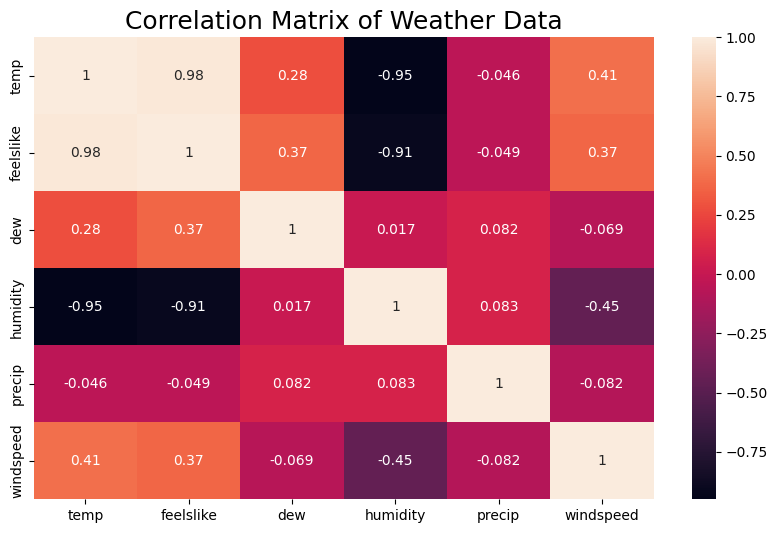

In [14]:
# Plot the correlation matrix of the weather data
selected_columns = ['temp', 'feelslike', 'dew', 'humidity', 'precip', 'windspeed']
correlation_matrix = local[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket')
plt.title('Correlation Matrix of Weather Data', fontsize=18)
plt.show()

## **Plot the data**

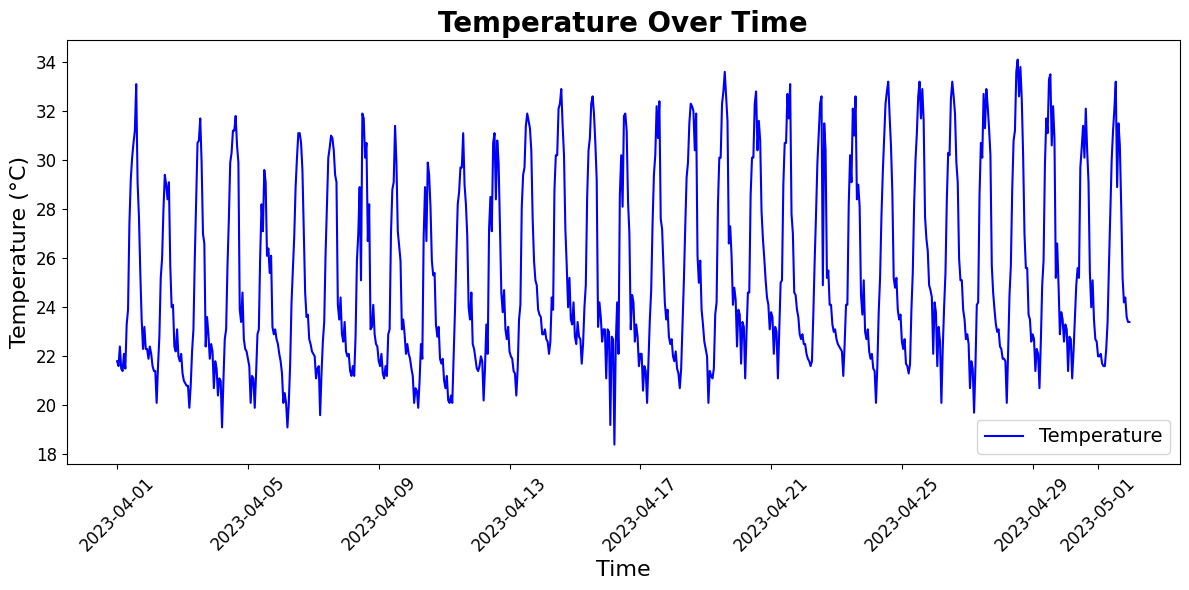

In [15]:
# Create a time series plot for temperature overtime
plt.figure(figsize=(12, 6))
plt.plot(local.index, local['temp'], color='blue')
plt.title('Temperature Over Time', fontsize=20, fontweight='bold')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Temperature (°C)', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to fit labels and title properly
plt.show()

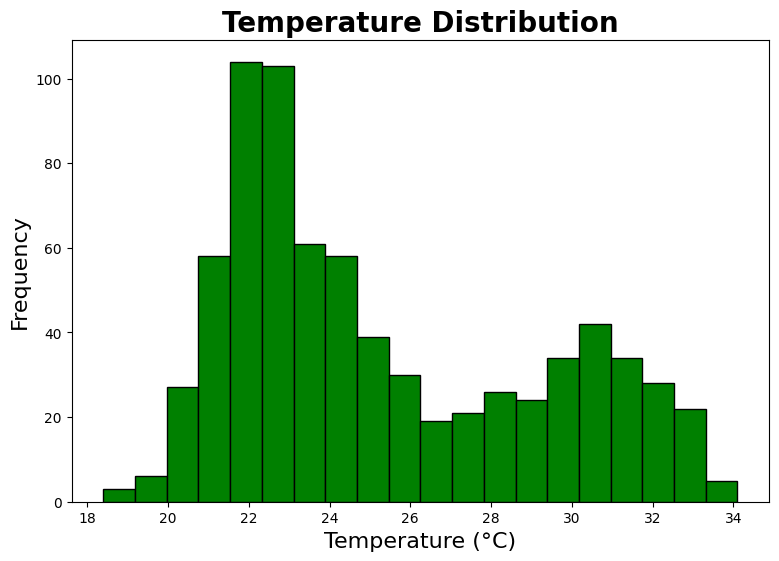

In [16]:
# Plot a histogram of temperature values
plt.figure(figsize=(9, 6))
plt.hist(local['temp'], bins=20, color='green', edgecolor='black')
plt.title('Temperature Distribution', fontsize=20, fontweight='bold')
plt.xlabel('Temperature (°C)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

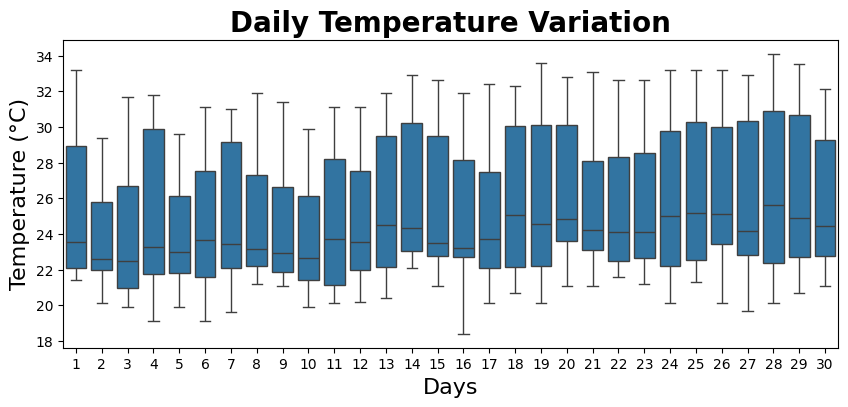

In [27]:
# Use box plots to visualize the variation in temperature across different days of the month
plt.figure(figsize=(10, 4))
sns.boxplot(x=local.index.day, y=local['temp'])
plt.title('Daily Temperature Variation', fontsize=20, fontweight='bold')
plt.xlabel('Days', fontsize=16)
plt.ylabel('Temperature (°C)', fontsize=16)
plt.show()

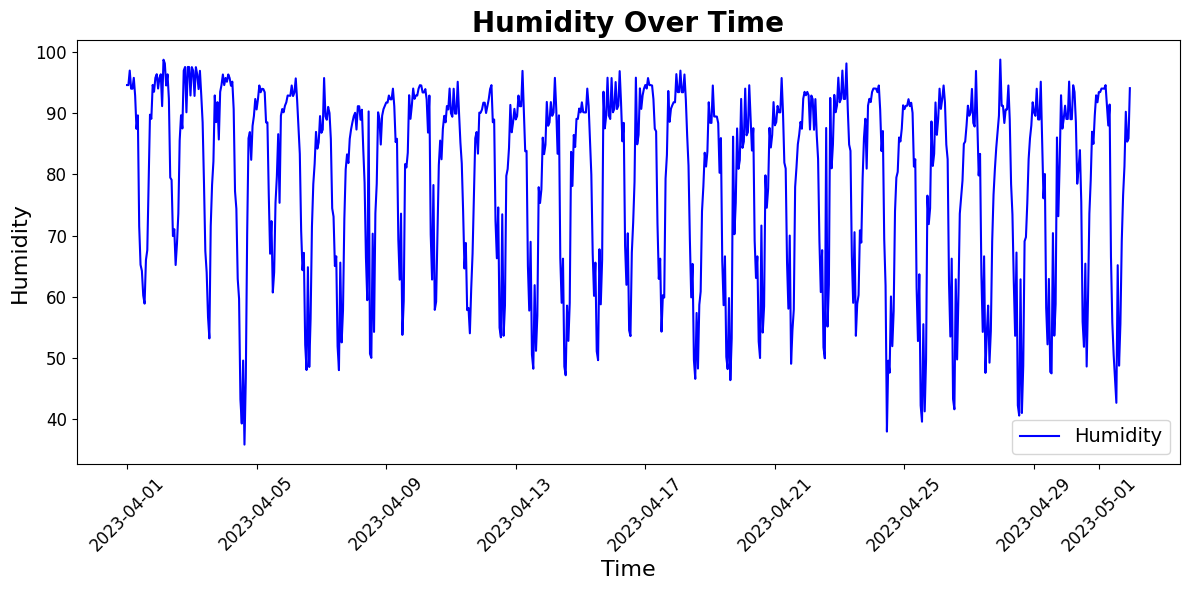

In [18]:
# Create a time series plot for temperature overtime
plt.figure(figsize=(12, 6))
plt.plot(local.index, local['humidity'], color='blue')
plt.title('Humidity Over Time', fontsize=20, fontweight='bold')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Humidity', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(['Humidity'], fontsize=14)
plt.tight_layout()
plt.show()

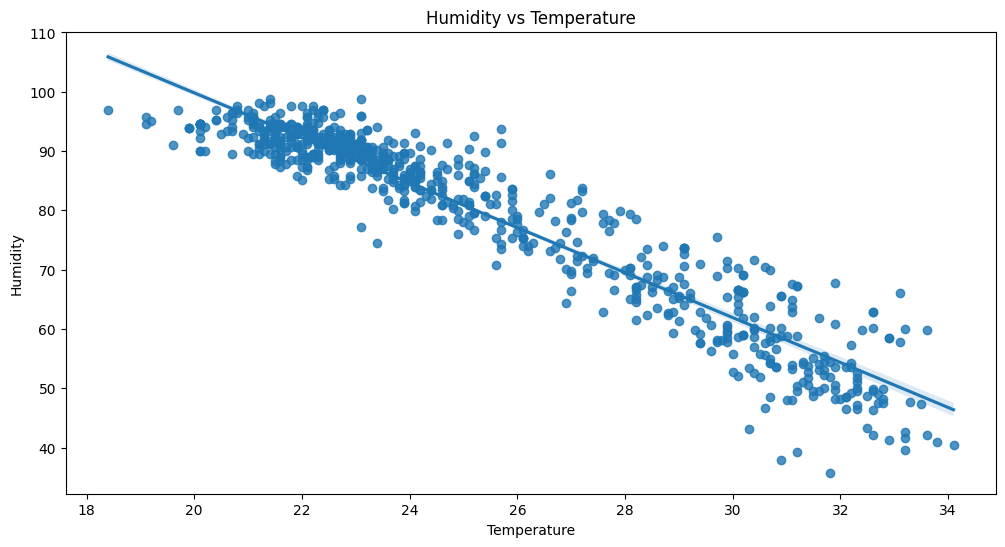

In [19]:
# Create a linear reggresion plot for humidity vs tempearature
plt.figure(figsize=(12,6))
sns.regplot(x='temp', y='humidity', data=local)
plt.title('Humidity vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

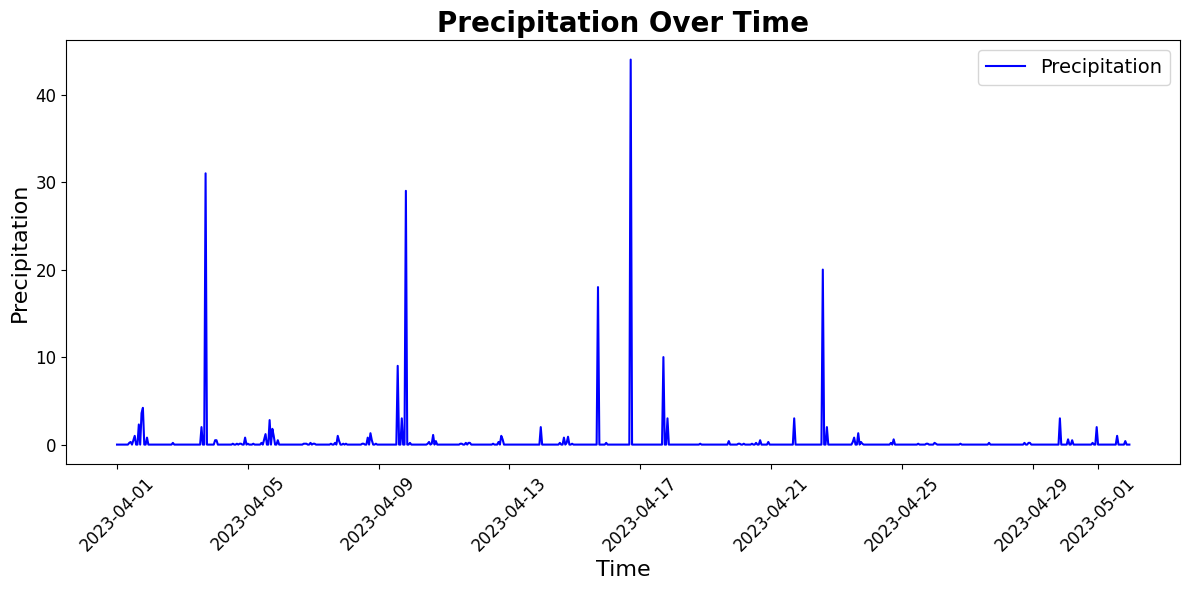

In [44]:
# Create a time series plot for precipitation overtime
plt.figure(figsize=(12, 6))
plt.plot(local.index, local['precip'], color='blue')
plt.title('Precipitation Over Time', fontsize=20, fontweight='bold')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Precipitation', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(['Precipitation'], fontsize=14)
plt.tight_layout()
plt.show()

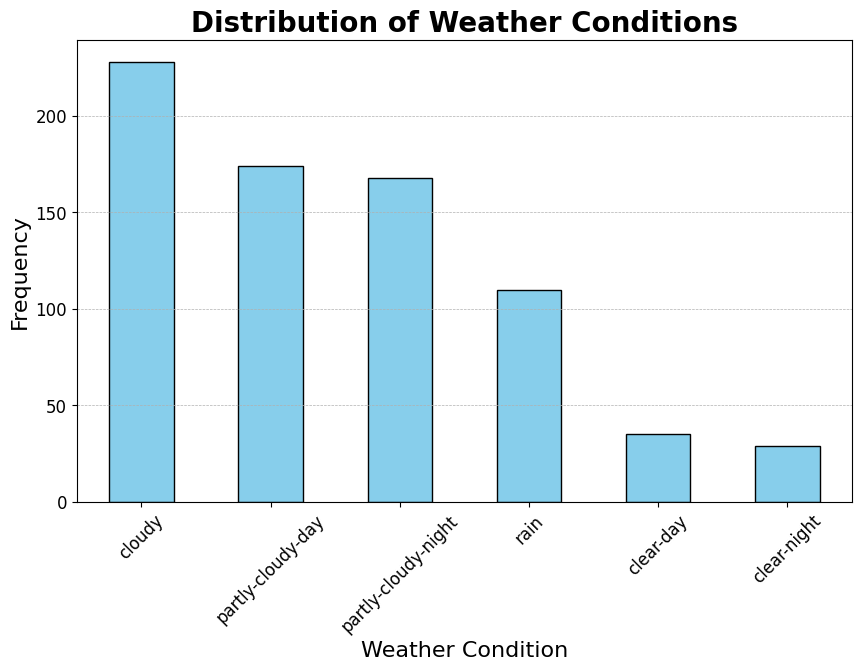

In [26]:
# Plot a bar chart of weather conditions
plt.figure(figsize=(10, 6))
weather_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Weather Conditions', fontsize=20, fontweight='bold')
plt.xlabel('Weather Condition', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [41]:
# Classify the precipitaion data
def classify_precipitation(precip):
    if precip < 2:
        return 'No Rain'
    elif 2 <= precip <= 4:
        return 'Light Rain'
    elif 5 <= precip <= 6:
        return 'Moderate Rain'
    else:
        return 'Strong Rain'

local['precip_category'] = local['precip'].apply(classify_precipitation)
precip_counts = local['precip_category'].value_counts()
print(precip_counts)

precip_category
No Rain        725
Light Rain      11
Strong Rain      8
Name: count, dtype: int64


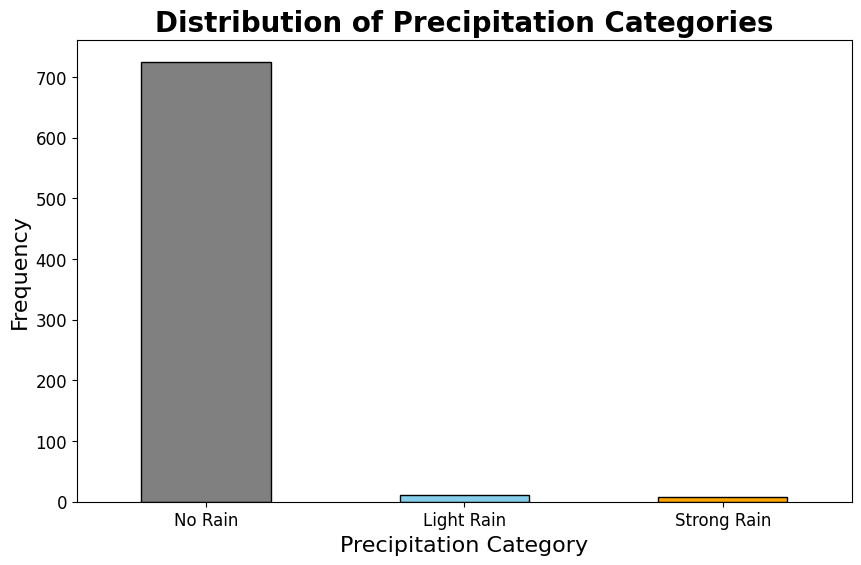

In [45]:
plt.figure(figsize=(10, 6))
precip_counts.plot(kind='bar', color=['gray', 'skyblue', 'orange', 'red'], edgecolor='black')
plt.title('Distribution of Precipitation Categories', fontsize=20, fontweight='bold')
plt.xlabel('Precipitation Category', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Conclusion

The Weather Data Analysis project has successfully leveraged the comprehensive meteorological dataset from the weather station at Central Mindanao University to uncover significant patterns and trends in the region's climate. By analyzing key weather parameters such as temperature, humidity, precipitation, and various weather conditions, we have gained valuable insights into the local climate dynamics.

**Key Findings:**

**Correlation Between Weather Variables:**



*   Strong positive correlations were identified between temperature and feels-like temperature, indicating their close relationship.
*   Understanding these correlations helps in predicting one weather variable based on another, enhancing weather forecasting accuracy.


**Temperature Trends and Variations:**

* The time series plot of temperature highlighted daily and seasonal variations, with identifiable trends and anomalies.
* The histogram of temperature distribution provided insight into the most common temperature ranges, aiding in the understanding of typical weather conditions.

**Humidity and Its Relationship with Temperature:**

* Patterns in humidity levels were observed, with a noticeable trend showing how humidity changes with temperature. It shows it has a negative correlation which indcates that when temperature rises the humidity decreases.

**Precipitation Patterns:**

* The time series plot of precipitation revealed periods of rainfall and dry spells, essential for water resource management and agricultural activities.

**Weather Condition Frequencies:**

* The distribution of weather conditions highlighted the most frequent weather types, such as cloudy and clear days, which is crucial for daily planning and long-term environmental strategies. It shows that during the month of April 1, 2023 to May 1, 2023, it is mostly cloudy/rainy during that time.

**Precipitation Patterns:**

* **No Rain:** Most days fall into the 'No Rain' category, indicating dry conditions.
* **Light Rain:** Light Rain (2-4 mm) occurs relatively frequently, indicating mild rainfall events.
* **Moderate Rain:** Moderate Rain (5-6 mm) is less common but notable.
* **Strong Rain:** Strong Rain (more than 6 mm) is the least common but represents significant rainfall events.


**Overall Implications:**

This analysis provides a thorough understanding of the weather patterns at Central Mindanao University, offering valuable insights for various stakeholders, including researchers, farmers, and policy-makers. By understanding the interplay between different weather elements, better forecasting models can be developed, agricultural practices can be optimized, and overall environmental management can be improved.

The insights gained from this project underscore the importance of continuous weather monitoring and data analysis in enhancing our preparedness for diverse weather scenarios. As Central Mindanao University continues to collect and analyze weather data, the region can look forward to more informed decision-making and improved responses to climatic changes.